In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing import sequence
from keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import plot_model

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
word_number = 2500
embedding_size = 64
batch_size = 32
num_epochs = 5
max_dimension = 500

(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=word_number)
X_train = sequence.pad_sequences(X_train, maxlen=max_dimension)
X_test = sequence.pad_sequences(X_test, maxlen=max_dimension)

model = Sequential()
model.add(layers.Embedding(word_number, embedding_size, input_length=max_dimension))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences = True)))
model.add(layers.Dropout(0.2))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(20, activation="relu"))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 64)           160000    
                                                                 
 batch_normalization (BatchN  (None, 500, 64)          256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 500, 64)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 500, 128)         66048     
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 500, 128)          0         
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0

In [3]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

history = model.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test), 
          batch_size=batch_size, 
          epochs=num_epochs)

Epoch 1/5
782/782 [==============================] - 53s 64ms/step - loss: 0.4849 - accuracy: 0.7490 - val_loss: 0.2827 - val_accuracy: 0.8816
Epoch 2/5
782/782 [==============================] - 50s 64ms/step - loss: 0.2926 - accuracy: 0.8821 - val_loss: 0.2586 - val_accuracy: 0.8938
Epoch 3/5
782/782 [==============================] - 50s 64ms/step - loss: 0.2360 - accuracy: 0.9088 - val_loss: 0.2531 - val_accuracy: 0.8922
Epoch 4/5
782/782 [==============================] - 50s 64ms/step - loss: 0.2008 - accuracy: 0.9246 - val_loss: 0.2525 - val_accuracy: 0.8931
Epoch 5/5
782/782 [==============================] - 50s 64ms/step - loss: 0.1744 - accuracy: 0.9348 - val_loss: 0.2626 - val_accuracy: 0.8930


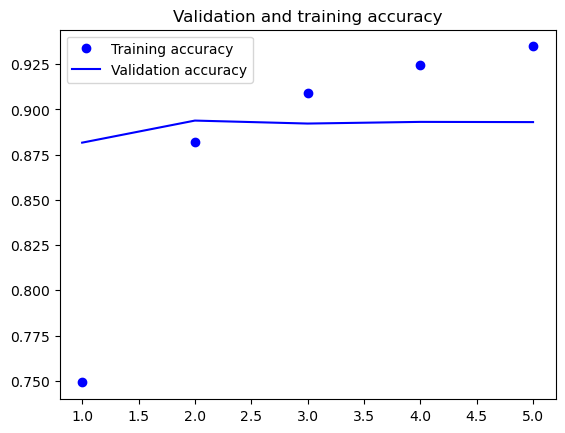

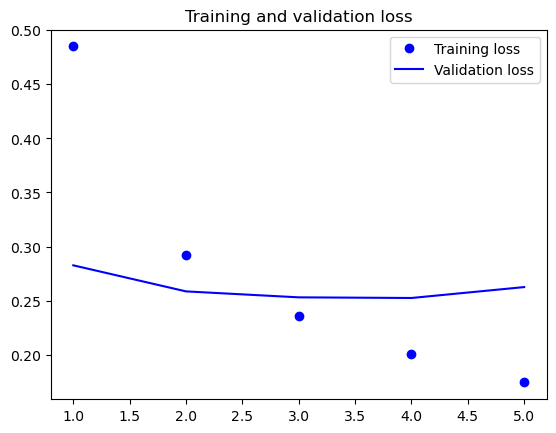

In [4]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Validation and training accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [5]:
scores = model.evaluate(X_test, Y_test, verbose=1)
model.save("model.h5")

model = models.load_model("model.h5")
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

782/782 [==============================] - 16s 20ms/step - loss: 0.2626 - accuracy: 0.8930
Loss: 0.263
Accuracy: 0.893


In [4]:
from tensorflow.keras import models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

model = models.load_model("model.h5")

word_number = 2500
embedding_size = 64
batch_size = 32
num_epochs = 5
max_dimension = 500

(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=word_number)
X_train = sequence.pad_sequences(X_train, maxlen=max_dimension)
X_test = sequence.pad_sequences(X_test, maxlen=max_dimension)

scores = model.evaluate(X_test, Y_test, verbose=1)

model.summary()

print(f'Loss: {scores[0]}')
print(f'Accuracy: {scores[1]}' )

782/782 [==============================] - 21s 21ms/step - loss: 0.2626 - accuracy: 0.8930
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 64)           160000    
                                                                 
 batch_normalization (BatchN  (None, 500, 64)          256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 500, 64)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 500, 128)         66048     
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 500, 128)          0         
                               